In [75]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [76]:
# import data
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [77]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.4, random_state = 10)

![title](img/theory.jpeg)

In [78]:
def NewtonianPotential(r, a = 1):
	return 1.0 / (r + a)

In [79]:
from sklearn import metrics


class PotentialClassifier:
	def __init__(self, train_x: np.array, train_y: np.array, kernel, window_width, epoch_number: int):
		self.classes = np.unique(train_y)
		self.train_x = train_x
		self.train_y = train_y
		self.gammas = np.zeros_like(train_y)
		self.indexes = np.arange(0, len(train_y))
		self.Kernel = kernel
		self.h = window_width
		self.epoch_number = epoch_number


	@staticmethod
	def minkowski_distances(u, v, p=2):
		return np.sum(((u - v) ** p), -1) ** (1 / p)


	def predict(self, x: np.array):
		test_x = np.copy(x)
		if len(test_x.shape) < 2:
			test_x = test_x[np.newaxis, :]
		u = test_x[:, np.newaxis, :]
		v = self.train_x[np.newaxis, :, :]
		distance = self.minkowski_distances(u, v)
		weights = self.gammas * self.Kernel(distance / self.h)
		table = np.zeros((test_x.shape[0], len(self.classes)))
		for Class in self.classes:
			table[:, Class] = np.sum(weights[:, self.train_y == Class], axis=1)
		return np.argmax(table, axis=1)


	def fit(self):
		self.gammas[0] = 1
		for _ in range(self.epoch_number):
			for i in range(self.train_x.shape[0]):
				if self.predict(self.train_x[i]) != self.train_y[i]: self.gammas[i] += 1
		# deleting zero charges
		non_zero_mask = self.gammas != 0
		self.train_x = self.train_x[non_zero_mask, ...]
		self.train_y = self.train_y[non_zero_mask, ...]
		self.gammas = self.gammas[non_zero_mask, ...]
		self.indexes = self.indexes[non_zero_mask, ...]


	def show_accuracy(self, test_x, test_y):
		predict_arr = self.predict(test_x)
		print(f'Accuracy on:'
			  f'\ntest is: {metrics.accuracy_score(test_y, predict_arr)};'
			  f'\ntrain is: {metrics.accuracy_score(self.train_y, self.predict(self.train_x))}.')


	def get_bad_prediction_arr(self, test_x, test_y):
		bad_predictions_array = list()
		predict_arr = self.predict(test_x)
		for i in range(len(test_y)):
			if predict_arr[i] != test_y[i]:
				bad_predictions_array.append(i)
		return bad_predictions_array

In [80]:
potential_classifier = PotentialClassifier(train_x, train_y, NewtonianPotential, 10, 4)
potential_classifier.fit()
potential_classifier.show_accuracy(test_x, test_y)

Accuracy on:
test is: 0.9833333333333333;
train is: 0.9285714285714286.


Charges of points =  [1 3 2 1 3 2 3 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 3 2 3 1 1 2]


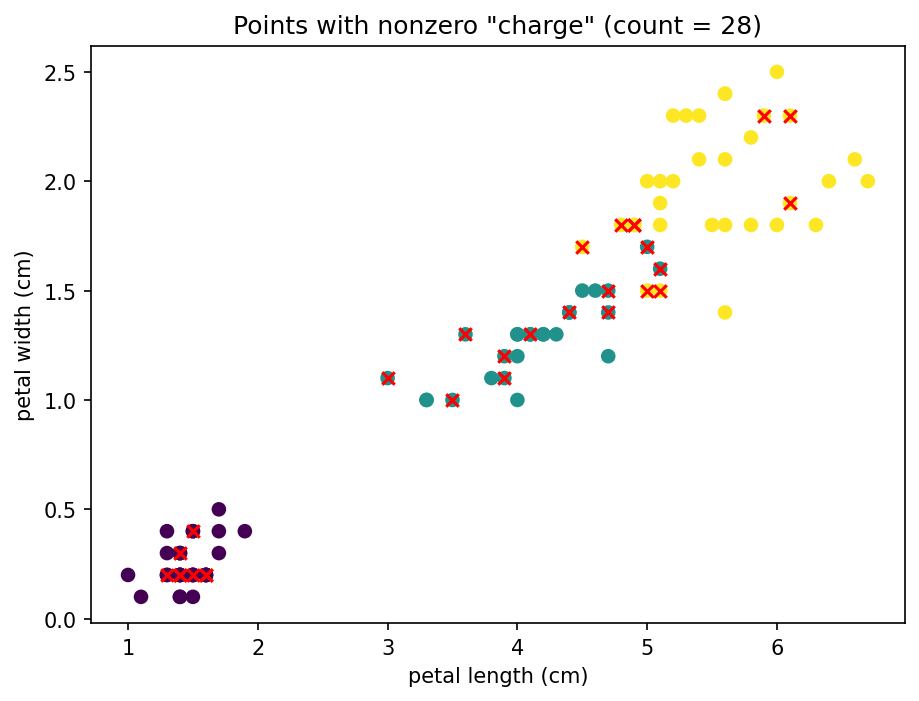

In [81]:
# Выделенные фичи (можно взять другие)
highlighted_features = (2, 3)
highlighted_features_names = (feature_names[highlighted_features[0]], feature_names[highlighted_features[1]])
# Построения графика значений для этих фич и помечание ненулевых зарядов
plt.figure(figsize=(7, 5), dpi=150)
plt.title(f"Points with nonzero \"charge\" (count = {len(potential_classifier.indexes)})")
plt.scatter(train_x[:, highlighted_features[0]], train_x[:, highlighted_features[1]], c=train_y) # все точки по классам
plt.scatter(train_x[:, highlighted_features[0]][potential_classifier.indexes], train_x[:, highlighted_features[1]][potential_classifier.indexes], c='r', marker='x') # точки с ненулевым зарядом
plt.xlabel(highlighted_features_names[0])
plt.ylabel(highlighted_features_names[1])
print("Charges of points = ", potential_classifier.gammas)